In [1]:
include("./SuperLattice.jl")

Main.SuperLattice

In [2]:
using .SuperLattice
using LaTeXStrings
using Plots
pyplot()

Plots.PyPlotBackend()

# Studies of analytic and numeric ground energy $E_0$
The Hamiltonian of the full model is in the form
$$\hat{H}=\sum_{j}(I_j-\delta)\hat{\sigma}_{j}^x-\Omega\sum_{j}\hat{\sigma}_{j}^{z}+\sum_{j}\frac{V_j}{4}\hat{\sigma}_{j}^{x}\hat{\sigma}_{j+1}^{x}+\sum_{j}\frac{V_3}{4}\hat{\sigma}_{j}^{x}\hat{\sigma}_{j+2}^{x},$$
in which $V_j=V_1(\text{or}\ V_2)$ for odd (or even) $j$'s and all $\hat{\sigma}$'s are $1/2$ spin operators.

In this note we will assume $(I_j-\delta)=0$ always. With approximation in which omitting all the triple fermionic operator interactions after Jordan-Wigner transformation, a closed formula for spectrum of the Hamiltonian can be acheived in the form
$$\epsilon_{k}=\pm\sqrt{[(V_1+V_2)\sin(k)+V_{3}\sin(2k)]^2+[8\Omega+(V_1+V_2)\cos(k)+V_{3}\cos(2k)]^2}.$$

The true global ground state energy $E_{0}$ is therefore in the form (given the fact that we assume $N$ is always even)
$$E_{0}=-\sum_{k>0}^{\text{ABC}}\epsilon_{k},$$
in which $k\in\{k=\pm\frac{(2n-1)\pi}{L}|n=1,...,\frac{L}{2}\}$.

## Consider $\Omega \geq 1$
We will first study what effects of increasing z-directional external field $h_z$ (i.e., $\Omega$) will cause the discrepancies between analytic and numeric ground energy. By keeping $C_6=-1$, $a=1.9$ and $l=4$, we vary $\Omega$ with $1$, $5$ and $10$.

In [3]:
Ns = 10:2:20;

In [4]:
f(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=1, N=x);
g(x) = generate_eigs(N=x, hx=0, hz=1, l=4, a=1.9, C6=-1, gstate=true);

f1(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=5, N=x);
g1(x) = generate_eigs(N=x, hx=0, hz=5, l=4, a=1, C6=-1, gstate=true);

f2(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=10, N=x);
g2(x) = generate_eigs(N=x, hx=0, hz=10, l=4, a=1, C6=-1, gstate=true);

In [5]:
fs = [f(N) for N in Ns];
@time gs = [g(N)[1][1] for N in Ns];

fs1 = [f1(N) for N in Ns];
@time gs1 = [g1(N)[1][1] for N in Ns];

fs2 = [f2(N) for N in Ns];
@time gs2 = [g2(N)[1][1] for N in Ns];

 26.767051 seconds (32.05 M allocations: 44.633 GiB, 10.66% gc time, 23.77% compilation time)
 19.749612 seconds (268.01 k allocations: 42.943 GiB, 9.81% gc time, 0.29% compilation time)
 20.257319 seconds (199.35 k allocations: 42.939 GiB, 10.54% gc time, 0.15% compilation time)


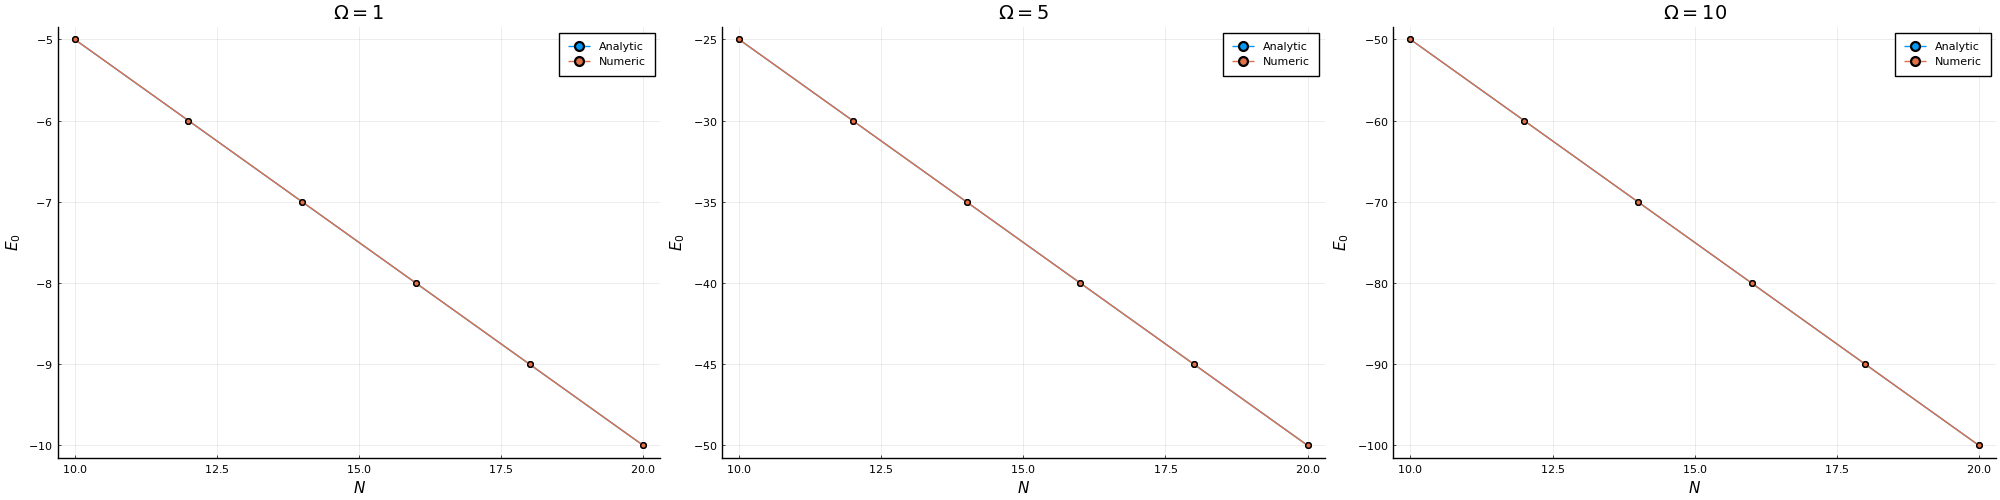

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/tianyiyan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [6]:
l = @layout [a b c]
p1 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=1$")
p2 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=5$")
p3 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=10$")

plot!(p1, Ns, fs, marker=:circle, label="Analytic")
plot!(p1, Ns, gs, marker=:circle, label="Numeric")
plot!(p2, Ns, fs1, marker=:circle, label="Analytic")
plot!(p2, Ns, gs1, marker=:circle, label="Numeric")
plot!(p3, Ns, fs2, marker=:circle, label="Analytic")
plot!(p3, Ns, gs2, marker=:circle, label="Numeric")
plot(p1, p2, p3, layout=l, size=(2000,500))

We notice here that assuming $\Omega\geq1$, increasing $\Omega$ will not affect the discrepancies between numeric and analytic ground energy. We notice here that the analytic calculation matches perfectly with numerical simulations.

## Consider $\Omega < 1$
In the same setup as above, by setting $C_6=-1$, $a=1.9$ and $l=4$, we vary $\Omega$ with $0.1$, $0.5$ and $0.9$.

In [7]:
f3(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=0.1, N=x);
g3(x) = generate_eigs(N=x, hx=0, hz=0.01, l=4, a=1.9, C6=-1, gstate=true);

f4(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=0.5, N=x);
g4(x) = generate_eigs(N=x, hx=0, hz=0.05, l=4, a=1, C6=-1, gstate=true);

f5(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=0.9, N=x);
g5(x) = generate_eigs(N=x, hx=0, hz=0.09, l=4, a=1, C6=-1, gstate=true);

In [8]:
fs3 = [f3(N) for N in Ns];
@time gs3 = [g3(N)[1][1] for N in Ns];

fs4 = [f4(N) for N in Ns];
@time gs4 = [g4(N)[1][1] for N in Ns];

fs5 = [f5(N) for N in Ns];
@time gs5 = [g5(N)[1][1] for N in Ns];

 21.877058 seconds (269.12 k allocations: 42.943 GiB, 11.59% gc time, 0.17% compilation time)
 28.026987 seconds (268.11 k allocations: 42.943 GiB, 7.59% gc time, 0.16% compilation time)
 23.524225 seconds (199.40 k allocations: 42.939 GiB, 8.96% gc time, 0.14% compilation time)


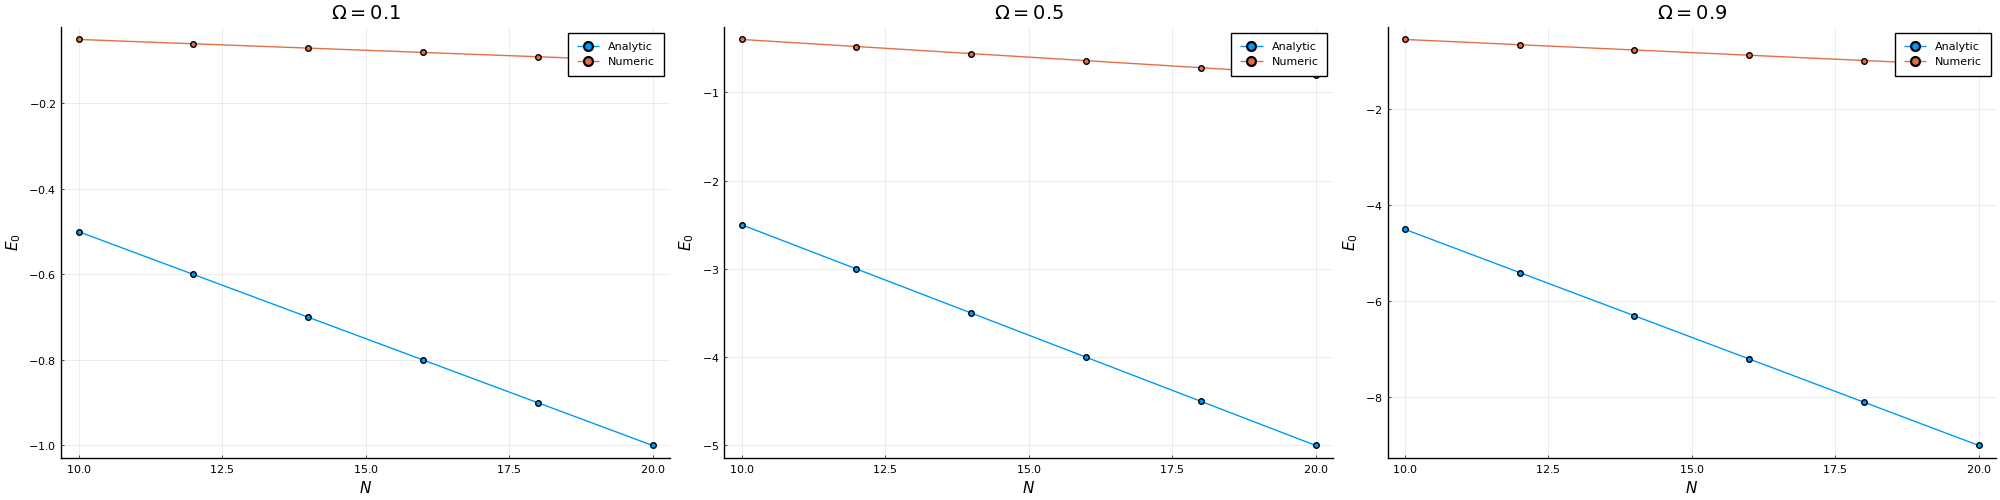

In [9]:
l = @layout [a b c]
p4 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=0.1$")
p5 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=0.5$")
p6 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=0.9$")

plot!(p4, Ns, fs3, marker=:circle, label="Analytic")
plot!(p4, Ns, gs3, marker=:circle, label="Numeric")
plot!(p5, Ns, fs4, marker=:circle, label="Analytic")
plot!(p5, Ns, gs4, marker=:circle, label="Numeric")
plot!(p6, Ns, fs5, marker=:circle, label="Analytic")
plot!(p6, Ns, gs5, marker=:circle, label="Numeric")
plot(p4, p5, p6, layout=l, size=(2000,500))

we notice here that as $\Omega < 1$, the discrepancies between numerical and analytical calculations diverge as $N$ increases.

## Plot with respect to $a$
We notice that the ground state energy is sensiable to the distance $a$, as we can see below.

### Assuming $\Omega << 1$
Here, we set $C_6=-1000$, $l=10$ and $\Omega=0.04$

In [10]:
f6(x) = global_ground_energy(;v1=-1000/x^6, v2=-1000/(10-x)^6, v3=-1000/10^6, Ω=0.04, N=16);
g6(x) = generate_eigs(N=16, hx=0, hz=0.04, l=10, a=x, C6=-1000, gstate=true);

In [11]:
as = 1:0.1:5;

fs6 = [f6(a) for a in as];
gs6 = [g6(a)[1][1] for a in as];

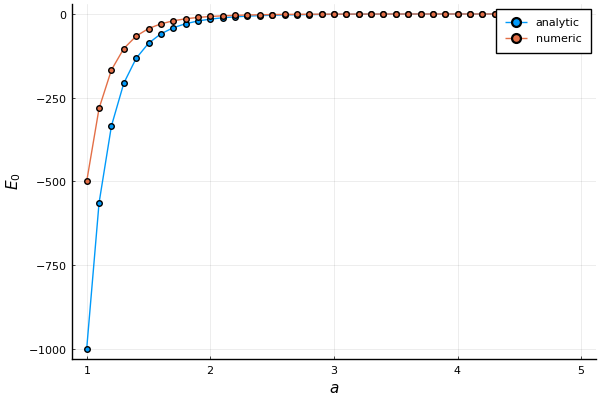

In [12]:
p7 = plot(xlab=L"$a$", ylab=L"$E_0$")
plot!(p7, as, fs6, marker=:circle, label="analytic")
plot!(p7, as, gs6, marker=:circle, label="numeric")

### Assuming $\Omega > 1$
Here, we set $C_6=-100000$, $l=10$ and $\Omega=4$

In [13]:
f7(x) = global_ground_energy(;v1=-100000/x^6, v2=-100000/(10-x)^6, v3=-100000/10^6, Ω=4, N=16);
g7(x) = generate_eigs(N=16, hx=0, hz=4, l=10, a=x, C6=-100000, gstate=true);

In [14]:
@time fs7 = [f7(a) for a in as];
@time gs7 = [g7(a)[1][1] for a in as];

  0.047581 seconds (139.27 k allocations: 7.486 MiB, 99.59% compilation time)
 36.681855 seconds (1.06 M allocations: 63.030 GiB, 5.22% gc time, 0.07% compilation time)


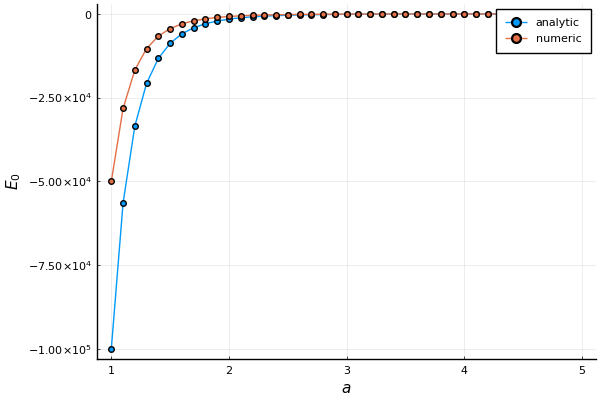

In [15]:
p8 = plot(xlab=L"$a$", ylab=L"$E_0$")
plot!(p8, as, fs7, marker=:circle, label="analytic")
plot!(p8, as, gs7, marker=:circle, label="numeric")

### Assuming $l$ is larger
Here, we set $C_6=-1000000$, $l=20$ and $\Omega=4$

In [16]:
f8(x) = global_ground_energy(;v1=-1000000/x^6, v2=-1000000/(20-x)^6, v3=-1000000/20^6, Ω=4, N=16);
g8(x) = generate_eigs(N=16, hx=0, hz=4, l=20, a=x, C6=-1000000, gstate=true);

In [17]:
as1 = 1:0.2:10
@time fs8 = [f8(a) for a in as1];
@time gs8 = [g8(a)[1][1] for a in as1];

  0.064474 seconds (139.28 k allocations: 7.487 MiB, 99.34% compilation time)
 35.114570 seconds (1.17 M allocations: 70.716 GiB, 5.45% gc time, 0.06% compilation time)


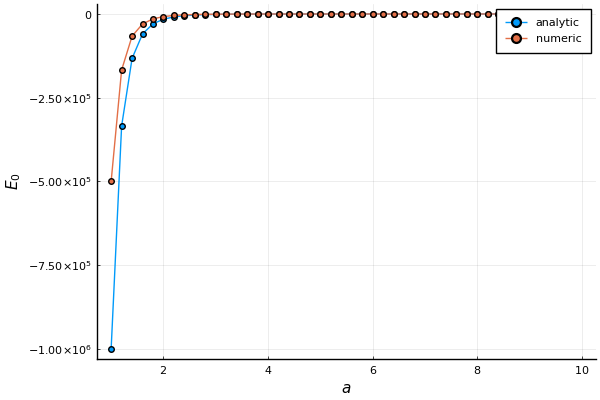

In [18]:
p9 = plot(xlab=L"$a$", ylab=L"$E_0$")
plot!(p9, as1, fs8, marker=:circle, label="analytic")
plot!(p9, as1, gs8, marker=:circle, label="numeric")

## Plot with respect to $l$
In this case, we assume $a=2.5$, $C_6=-1000$ and $\Omega=5$ and we run $l$ from $4$ to $10$.

In [19]:
f9(x) = global_ground_energy(;v1=-1000/2.5^6, v2=-1000/(x-2.5)^6, v3=-1000/x^6, Ω=5, N=16);
g9(x) = generate_eigs(N=16, hx=0, hz=5, l=x, a=2.5, C6=-1000, gstate=true);

In [20]:
ls = 4:0.2:10
@time fs9 = [f9(l) for l in ls];
@time gs9 = [g9(l)[1][1] for l in ls];

  0.083556 seconds (113.24 k allocations: 5.939 MiB, 99.44% compilation time)
 18.928249 seconds (885.01 k allocations: 47.661 GiB, 6.67% gc time, 0.26% compilation time)


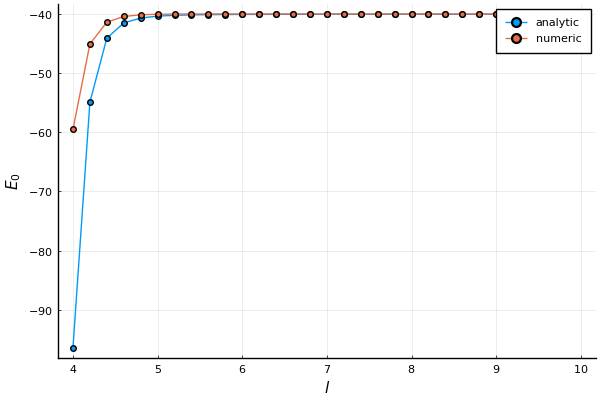

In [21]:
p10 = plot(xlab=L"$l$", ylab=L"$E_0$")
plot!(p10, ls, fs9, marker=:circle, label="analytic")
plot!(p10, ls, gs9, marker=:circle, label="numeric")